# Python Lab : Implementing IA algorithms via cloud solutions
### Part II: DeepLearning 
### Exemple1 : Image classification using tensorflow and keras

In [2]:
#importing all necessary librairies
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

img_width, img_heigth = 224 , 224

### Image classification is a method to classify the images into their repective category classes using some methods like: 
- training a small network from scratch 
- Fine-Tuning the top layers of the model using VGG16

In [4]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples = 400 
nb_validation_samples = 100 

epochs = 10
batch_size = 16 #nb_batchs or mini_batch nb_batchs = 400 /16

In [5]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_heigth ) #3 = > RGB 
else: 
    input_shape = (img_width, img_heigth ,3) 

In [10]:
model = Sequential()
model.add(Conv2D(32,(2,2) , input_shape = input_shape)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Images lecteur

model.add(Conv2D(32,(2,2))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2))) # Images borders

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Images Cornes and edges 


model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
# MSE , mean squeared error 
#binary_crossEntropy 

model.compile(loss = 'binary_crossentropy', 
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'] )

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./ 255 , 
    shear_range = 0.2 ,
    zoom_range =0.2 , 
    horizontal_flip = True ) 

Test_datagen = ImageDataGenerator(rescale = 1./ 255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size = (img_width, img_heigth),
    batch_size = batch_size, 
    class_mode = 'binary') 

Found 400 images belonging to 2 classes.


In [16]:
validation_generator = Test_datagen.flow_from_directory(
    validation_data_dir, 
    target_size = (img_width, img_heigth),
    batch_size = batch_size, 
    class_mode = 'binary') 

Found 100 images belonging to 2 classes.


In [17]:
model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs ,
    validation_data = validation_generator,
    validation_steps= nb_validation_samples // batch_size ) 

C:\Users\WISSAL~1\AppData\Local\Temp/ipykernel_2916/3355346810.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
25/25 [==============================] - 16s 611ms/step - loss: 0.9503 - accuracy: 0.6225 - val_loss: 0.5545 - val_accuracy: 0.6667
Epoch 2/10
25/25 [==============================] - 17s 661ms/step - loss: 0.5400 - accuracy: 0.7350 - val_loss: 0.3948 - val_accuracy: 0.8125
Epoch 3/10
25/25 [==============================] - 16s 643ms/step - loss: 0.4774 - accuracy: 0.8000 - val_loss: 0.6157 - val_accuracy: 0.6458
Epoch 4/10
25/25 [==============================] - 17s 675ms/step - loss: 0.3964 - accuracy: 0.8350 - val_loss: 0.3082 - val_accuracy: 0.8854
Epoch 5/10
25/25 [==============================] - 17s 661ms/step - loss: 0.3589 - accuracy: 0.8425 - val_loss: 0.2960 - val_accuracy: 0.8646
Epoch 6/10
25/25 [==============================] - 16s 637ms/step - loss: 0.3385 - accuracy: 0.8650 - val_loss: 0.2915 - val_accuracy: 0.8646
Epoch 7/10
25/25 [==============================] - 16s 625ms/step - loss: 0.2897 - accuracy: 0.9000 - val_loss: 0.5768 - val_accuracy: 0.7604

In [19]:
model.save_weights("model_saved.h5")

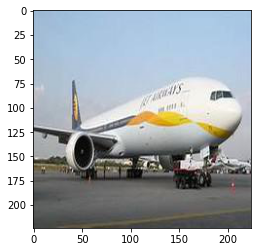

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('v_data/test/planes/5.jpg')
imgplot = plt.imshow(img) 
plt.show()

In [22]:
from keras.models import load_model 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np 


image = load_img('v_data/test/planes/5.jpg', target_size = (img_width, img_heigth))
img = np.array(image) 
img = img / 255.0
img = img.reshape(1,224,224,3) 
label = model.predict(img)
print("Predicted class ( 0. Cars , 1. Planes ) :" , label[0][0])


Predicted class ( 0. Cars , 1. Planes ) : 0.93533087


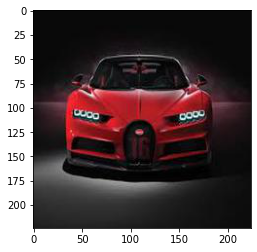

Predicted Class (0 - Cars , 1- Planes):  0.00014480948


In [23]:
img = mpimg.imread('v_data/test/cars/14.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/cars/14.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

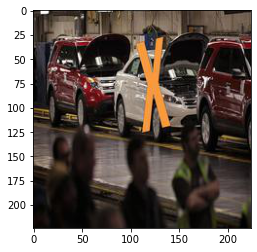

Predicted Class (0 - Cars , 1- Planes):  0.0035752952


In [24]:
img = mpimg.imread('v_data/test/cars/35.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/cars/35.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

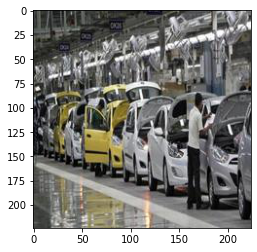

Predicted Class (0 - Cars , 1- Planes):  0.3041173


In [25]:
img = mpimg.imread('v_data/test/cars/7.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/cars/7.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

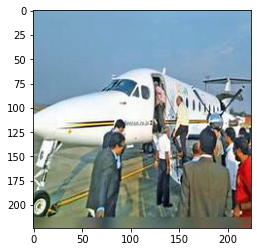

Predicted Class (0 - Cars , 1- Planes):  0.99641734


In [26]:
img = mpimg.imread('v_data/test/planes/12.jpg')
imgplot = plt.imshow(img)
plt.show()
image = load_img('v_data/test/planes/12.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224, 224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])